In [72]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 


The shape of the digits dataset:
(1797, 64)


<Figure size 432x288 with 0 Axes>

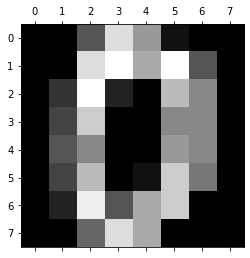

In [73]:
digits=load_digits()
X = digits.data
print("The shape of the digits dataset:") 
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()
y = digits.target
# print(y[0:1])
# print(X[0,:])

In [62]:
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)

# X[0,:] # Looking the new features after scaling

NameError: name 'digits' is not defined

In [63]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [64]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [65]:
# convert digits to vectors
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)


In [16]:
print(y_train[0:4])
print(y_v_train[0:4])


[3 6 7 0]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(64,), activation='sigmoid'),
    keras.layers.Dense(10)
])


In [26]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.25),
              loss='mean_squared_error',
              metrics=['accuracy'])


In [27]:
model.fit(X_train, y_v_train, epochs=3000, verbose=0)


In [28]:
test_loss, test_acc = model.evaluate(X_test,  y_v_test, verbose=2)

print('\nTest accuracy:', test_acc)


719/1 - 0s - loss: 0.0310 - accuracy: 0.9346

Test accuracy: 0.9346314


## Following Part is for Extensions 


### First Extension - Add Dropout Layer to Neural Network

In [46]:
dropout_model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(64,), activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

dropout_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.25),
              loss='mean_squared_error',
              metrics=['accuracy'])


In [47]:
dropout_model.fit(X_train, y_v_train, epochs=3000, verbose=0)


In [48]:
test_loss, test_acc = dropout_model.evaluate(X_test,  y_v_test, verbose=2)

print('\nTest accuracy:', test_acc)

719/1 - 0s - loss: 0.0164 - accuracy: 0.9652

Test accuracy: 0.9652295


## Test Cancer dataset 


In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
y = cancer.target
X = cancer.data

In [19]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)
# print(X[:4])
# print(y[:4])
# train_test_split to split the data 
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X, y,random_state=42)

(569, 30)
(569,)


In [23]:
X_scale = StandardScaler()
X_train_cancer = X_scale.fit_transform(X_train_cancer)
X_test_cancer = X_scale.fit_transform(X_test_cancer)


## Without dropout

In [34]:
new_dropout_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(30,), activation='sigmoid'),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

new_dropout_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.25),
              loss='mean_squared_error',
              metrics=['accuracy'])


In [35]:
new_dropout_model.fit(X_train_cancer, y_train_cancer, epochs=3000, verbose=0)


In [36]:
test_loss, test_acc = new_dropout_model.evaluate(X_test_cancer,  y_test_cancer, verbose=2)

print('\nTest accuracy:', test_acc)


143/1 - 0s - loss: 0.0319 - accuracy: 0.9510

Test accuracy: 0.951049


## With Dropout


In [37]:
new_dropout_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(30,), activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

new_dropout_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.25),
              loss='mean_squared_error',
              metrics=['accuracy'])


In [38]:
new_dropout_model.fit(X_train_cancer, y_train_cancer, epochs=3000, verbose=0)


In [39]:
test_loss, test_acc = new_dropout_model.evaluate(X_test_cancer,  y_test_cancer, verbose=2)

print('\nTest accuracy:', test_acc)


143/1 - 0s - loss: 0.0128 - accuracy: 0.9790

Test accuracy: 0.97902095


# Test Iris Dataset



## Without Dropout

In [50]:
from sklearn.datasets import load_iris

iris = load_iris()
y_iris = iris.target
X_iris = iris.data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris,random_state=42)
X_scale = StandardScaler()
X_train_iris = X_scale.fit_transform(X_train_iris)
X_test_iris = X_scale.fit_transform(X_test_iris)

In [51]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 3))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

# convert digits to vectors
y_v_train_iris = convert_y_to_vect(y_train_iris)
y_v_test_iris = convert_y_to_vect(y_test_iris)

In [53]:
print(X_train_iris.shape)
print(y_train_iris.shape)
print(y_train_iris[:3])
print(y_v_train_iris[:3])

(112, 4)
(112,)
[0 0 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [54]:
new_dropout_model = keras.Sequential([
    keras.layers.Dense(5, input_shape=(4,), activation='sigmoid'),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(3)
])

new_dropout_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.25),
              loss='mean_squared_error',
              metrics=['accuracy'])



In [55]:
new_dropout_model.fit(X_train_iris, y_v_train_iris, epochs=3000, verbose=0)


In [56]:
test_loss, test_acc = new_dropout_model.evaluate(X_test_iris,  y_v_test_iris, verbose=2)

print('\nTest accuracy:', test_acc)

38/1 - 0s - loss: 0.0070 - accuracy: 0.9737

Test accuracy: 0.9736842


## With Dropout



In [57]:
new_dropout_model = keras.Sequential([
    keras.layers.Dense(5, input_shape=(4,), activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3)
])

new_dropout_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.25),
              loss='mean_squared_error',
              metrics=['accuracy'])



In [58]:
new_dropout_model.fit(X_train_iris, y_v_train_iris, epochs=3000, verbose=0)

In [59]:
test_loss, test_acc = new_dropout_model.evaluate(X_test_iris,  y_v_test_iris, verbose=2)

print('\nTest accuracy:', test_acc)



38/1 - 0s - loss: 0.0208 - accuracy: 0.9737

Test accuracy: 0.9736842


## Extension 2 - Use Binary Cross Entropy as Loss Function in Neural Network


In [74]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(64,), activation='sigmoid'),
    keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.25),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [75]:
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [76]:
model.fit(X_train, y_v_train, epochs=3000, verbose=0)


In [77]:
test_loss, test_acc = model.evaluate(X_test,  y_v_test, verbose=2)

print('\nTest accuracy:', test_acc)

719/1 - 0s - loss: 0.9559 - accuracy: 0.9466

Test accuracy: 0.94659245


## Extension 3 - Use Softmax in Logistic Regression to solve